# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">CIFAR-10 Image Classification with CNN(88.54% Accuracy)</p>

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Introduction</font></h2>
    
This project focuses on building a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. CIFAR-10 is a popular dataset in the field of computer vision, consisting of 60,000 32x32 color images in 10 different classes, such as airplanes, automobiles, birds, and more. The objective of this project is to train a CNN model to accurately classify these images into their respective categories.

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Dataset Overview</font></h2>
    
The CIFAR-10 dataset contains 50,000 training images and 10,000 test images, each belonging to one of 10 classes:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

The dataset is pre-split into training and test sets. In this project, we further split the test set into validation and test sets to fine-tune our model's hyperparameters.

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h2 align="left"><font color=#8502d1>Table of Contents</font></h2>
    
* [Step 1 | Import Necessary Libraries](#import)
* [Step 2 | Data Preparation and Exploration](#exploration)
* [Step 3 | Define CNN Model Architecture](#cnn)
* [Step 4 | Training the CNN Model](#train)
* [Step 5 | Visualizing the Learning Curves](#curves)
* [Step 6 | Confusion Matrix, Classification report, ROC Curve and AUC Score](#metrics)
* [Step 7 | Conclusion](#conclusion)

<a id="import"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Necessary Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

<a id="exploration"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Data Preparation, Preprocessing and Exploration</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Preprocessing</font></h3>

The images were normalized to have pixel values between 0 and 1 to improve the convergence of the neural network. The test set was split into validation and test sets to tune the model during training.

In [3]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [4]:
# Split the test set into validation and test sets
val_images, test_images = test_images[:5000], test_images[5000:]
val_labels, test_labels = test_labels[:5000], test_labels[5000:]

In [5]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Sample Images</font></h3>

Visualizing some sample images from the training set to understand the kind of data we are dealing with.

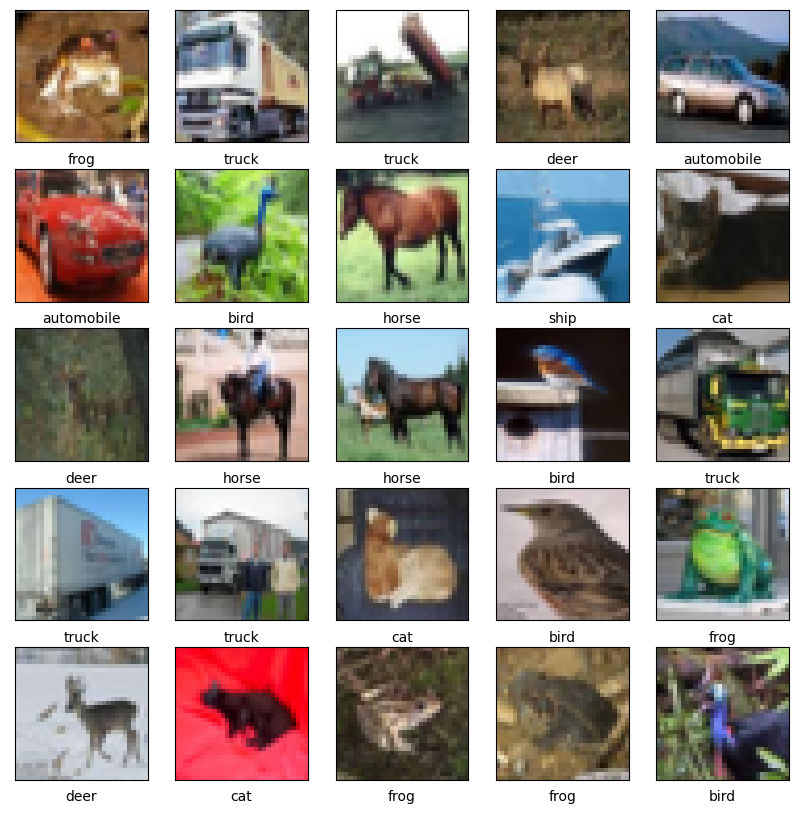

In [6]:
# EDA: Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>Class Distribution</font></h3>

We also analyze the distribution of classes in the training set to ensure that the dataset is balanced.

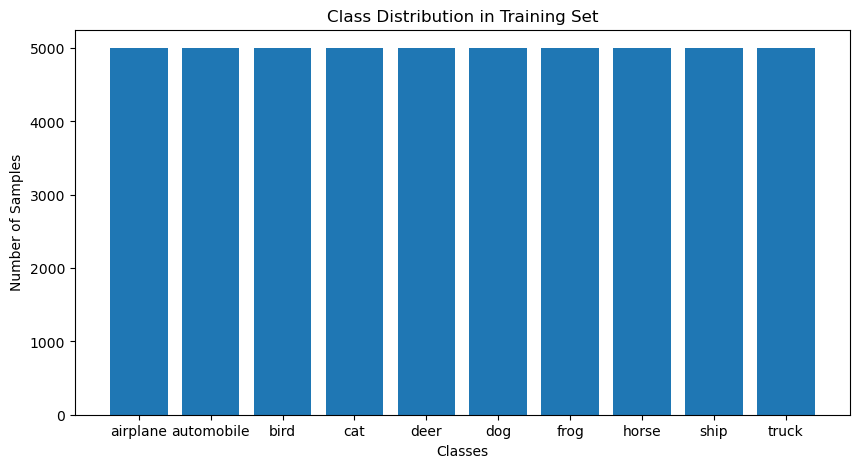

In [7]:
# EDA: Class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, [np.sum(train_labels == i) for i in range(10)])
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.show()

<a id="cnn"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Define CNN Model Architecture</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>CNN Architecture</font></h3>
    
We built a CNN model using TensorFlow and Keras with the following architecture:
- **Conv2D + BatchNormalization + ReLU**
- **Conv2D + BatchNormalization + ReLU**
- **MaxPooling2D + Dropout**
- **Conv2D + BatchNormalization + ReLU**
- **Conv2D + BatchNormalization + ReLU**
- **MaxPooling2D + Dropout**
- **Conv2D + BatchNormalization + ReLU**
- **Conv2D + BatchNormalization + ReLU**
- **MaxPooling2D + Dropout**
- **Flatten**
- **Dense (256 units) + BatchNormalization + ReLU**
- **Dropout**
- **Dense (10 units) + Softmax**

Regularization techniques such as L2 regularization and dropout were employed to prevent overfitting.


In [8]:
# Create a CNN model with regularization
def create_improved_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                      kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [9]:
# Create and compile the model
model = create_improved_cnn()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model Summary

In [10]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [11]:
# Learning rate scheduler and early stopping (same as before)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

<a id="train"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | Training the CNN Model</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The model was trained on the CIFAR-10 training set for 50 epochs with a batch size of 64, using Adam as the optimizer and sparse categorical cross-entropy as the loss function. Early stopping and learning rate scheduling were implemented to optimize the training process.

In [12]:
# Train the model
history = model.fit(
    train_images,
    train_labels,
    batch_size=64,
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/50
782/782 [==============================] - 196s 249ms/step - loss: 1.7354 - accuracy: 0.4430 - val_loss: 1.4977 - val_accuracy: 0.5182
Epoch 2/50
782/782 [==============================] - 195s 249ms/step - loss: 1.1479 - accuracy: 0.6289 - val_loss: 1.0763 - val_accuracy: 0.6516
Epoch 3/50
782/782 [==============================] - 190s 243ms/step - loss: 0.9768 - accuracy: 0.6988 - val_loss: 1.1509 - val_accuracy: 0.6390
Epoch 4/50
782/782 [==============================] - 190s 243ms/step - loss: 0.8808 - accuracy: 0.7384 - val_loss: 1.0151 - val_accuracy: 0.7010
Epoch 5/50
782/782 [==============================] - 201s 257ms/step - loss: 0.8331 - accuracy: 0.7590 - val_loss: 0.8529 - val_accuracy: 0.7622
Epoch 6/50
782/782 [==============================] - 186s 238ms/step - loss: 0.7961 - accuracy: 0.7781 - val_loss: 0.7604 - val_accuracy: 0.7920
Epoch 7/50
782/782 [==============================] - 188s 241ms/step - loss: 0.7682 - accuracy: 0.7940 - val_loss: 0.7975 -

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

157/157 - 4s - loss: 0.5823 - accuracy: 0.8856

Test accuracy: 0.8856


<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The training accuracy improved steadily over the epochs, and the validation accuracy reached 88.56% with minimal overfitting, as seen in the graphs below.

<a id="curves"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Visualizing the Learning Curves</p>

⬆️ [Tabel of Contents](#contents_tabel)

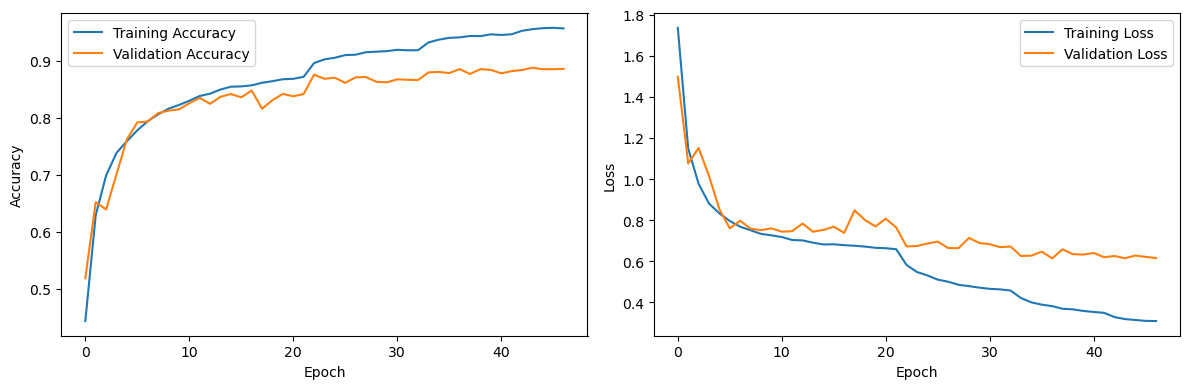

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<a id="metrics"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:120%; text-align:center; border-radius:15px 50px;">Step 6 | Confusion Matrix, Classification report, ROC Curve and AUC Score</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [15]:
# Predictions on test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The confusion matrix provides insight into the performance of the model across different classes.

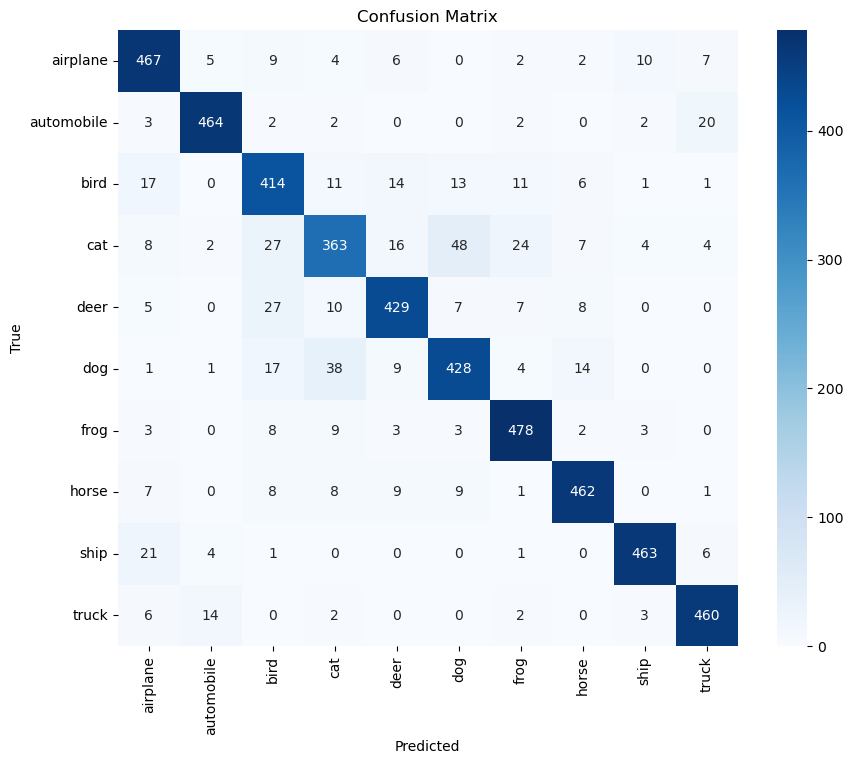

In [16]:
# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The classification report provides precision, recall, and F1-score for each class.

In [17]:
# Classification Report
print("\nClassification Report:")
print(classification_report(test_labels, y_pred_classes, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

    airplane       0.87      0.91      0.89       512
  automobile       0.95      0.94      0.94       495
        bird       0.81      0.85      0.83       488
         cat       0.81      0.72      0.76       503
        deer       0.88      0.87      0.88       493
         dog       0.84      0.84      0.84       512
        frog       0.90      0.94      0.92       509
       horse       0.92      0.91      0.92       505
        ship       0.95      0.93      0.94       496
       truck       0.92      0.94      0.93       487

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.88      5000



<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

<h3 align="left"><font color=#8502d1>ROC Curve and AUC Score</font></h3>

ROC curves and AUC scores were plotted for each class, showing the model's ability to distinguish between the classes.

In [18]:
# ROC Curve and AUC
n_classes = 10
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

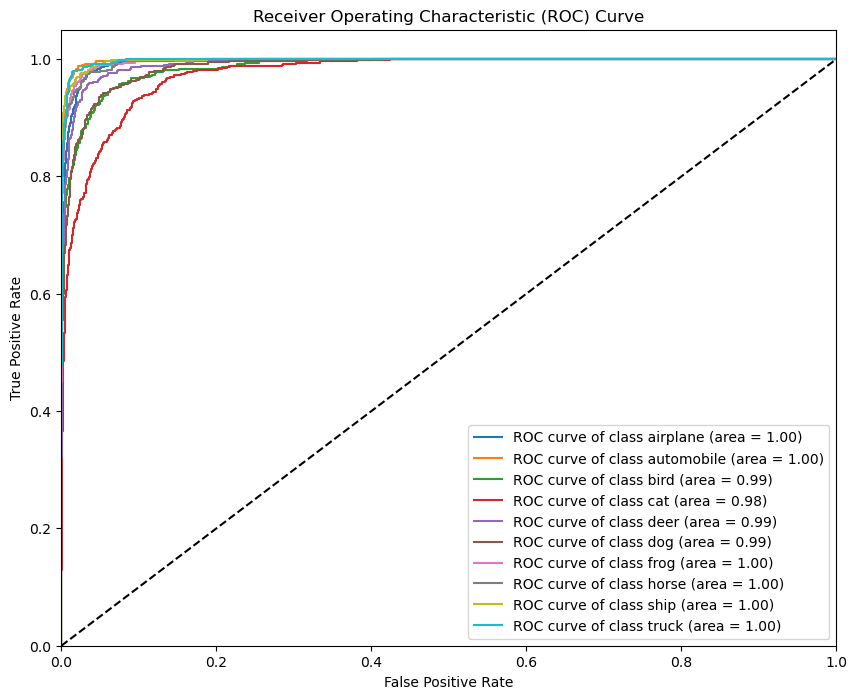


Average AUC: 0.9924


In [19]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and print the average AUC
average_auc = np.mean(list(roc_auc.values()))
print(f"\nAverage AUC: {average_auc:.4f}")

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

The average AUC score across all classes was 0.99, indicating a high level of discriminatory power.

In [20]:
# Save the model
model.save('cifar10_cnn_model.h5')

<a id="conclusion"></a>
# <p style="background-color:#8502d1; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Conclusion</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:12px; padding: 20px; background-color: #e2c9ff; font-size:125%; text-align:left">

This project successfully demonstrates the application of CNNs for image classification using the CIFAR-10 dataset. With careful model design, regularization, and training techniques, the model achieved a test accuracy of 88.56%. Further improvements could involve experimenting with different architectures, data augmentation techniques, and hyperparameter tuning.